In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/home/sarot/anaconda3/envs/py3tf/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
MY_BOUNDED_SET = 45000

num_input = 3
num_output = 3

num_hidden1 = 16
num_hidden2 = 16

N_EPOCHS = 10000
epoch = 0
train_rmse_list = []
test_rmse_list = []

session = tf.Session()

In [3]:
x = tf.placeholder(tf.float32, shape=[None, num_input])

y_true = tf.placeholder(tf.float32, shape=[None, num_output], name='y_true')
y_pred = tf.placeholder(tf.float32, shape=[None, num_output])

In [4]:
data_csv = pd.read_csv('../myCSVData.csv')
X = data_csv[['in1','in2','in3']]
y = data_csv[['out1','out2','out3']]
#X, y

In [5]:
X_train_pd = X[:MY_BOUNDED_SET]
X_test_pd = X[MY_BOUNDED_SET:]
y_train_pd = y[:MY_BOUNDED_SET]
y_test_pd = y[MY_BOUNDED_SET:]

X_train = X_train_pd.values
X_train = X_train.astype(np.float32)

y_train = y_train_pd.values
y_train = y_train.astype(np.float32)

X_test = X_test_pd.values
X_test = X_test.astype(np.float32)

y_test = y_test_pd.values
y_test = y_test.astype(np.float32)

print (X_train.shape, y_train.shape,X_test.shape,y_test.shape)

(4, 3) (4, 3) (0, 3) (0, 3)


In [44]:
# Evaluation
#rmse_a = tf.placeholder(tf.float32, [None, 3])
#rmse_b = tf.placeholder(tf.float32, [None, 3])
#rmse = tf.reduce_mean(tf.square(rmse_a - rmse_b))
rmse_a = []
pred_list = []

In [45]:
def cost_func(layer, my_y_true):
    ret = tf.sqrt(tf.reduce_mean(tf.square(layer - my_y_true)))
    #print (layer , my_y_true)
    #ret = tf.reduce_mean(tf.square(layer))
    return ret
            

In [46]:
X_train

array([[0.0827067, 0.740974 , 0.36644  ],
       [0.0827297, 0.740762 , 0.365998 ],
       [0.082753 , 0.74055  , 0.365552 ],
       [0.082776 , 0.740335 , 0.365109 ]], dtype=float32)

In [47]:
# Neural Network Structure
inputs = X_train

# Input Layer
input_layer = tf.Variable(inputs)

# Hidden Layer #1
h1 = tf.layers.dense(inputs=input_layer, 
                     units=num_hidden1,
                     use_bias=True,
                     activation=tf.nn.relu)
   
# Hidden Layer #2
h2 = tf.layers.dense(inputs=h1, 
                     units=num_hidden2,
                     use_bias=True,
                     activation=tf.nn.relu)
    
# Output Layer
output_layer = tf.layers.dense(inputs=h2, 
                     units=num_output,
                     use_bias=True,
                     activation=None)


In [48]:
cost = cost_func(output_layer,y_true)
output_layer

<tf.Tensor 'dense_6/BiasAdd:0' shape=(4, 3) dtype=float32>

In [49]:
optimizer = tf.train.AdamOptimizer(learning_rate=1e-5).minimize(cost)

In [50]:
session.run(tf.global_variables_initializer())

In [51]:
#print (session.run(tf.subtract(output_layer,y_true)).shape)
#print (X_train.shape)

In [52]:
print (y_true.shape)

(?, 3)


In [56]:
def train(N_EPOCHS):
    #global epoch
    global rmse_a
    global pred_list
    #global pred1,pred2,pred3
    for i in range(epoch, epoch + N_EPOCHS):
        feed_dict_train = {x: X_train,
                      y_true:X_train}

        
        session.run(optimizer, feed_dict=feed_dict_train)
        #epoch+=1
        cost_error = session.run(cost,feed_dict=feed_dict_train)
        print ("[" +str(i+1) +"]")
        print ("Train Accuracy : " , cost_error)
        
        rmse_a += [cost_error]
        pred_list += [session.run(output_layer,feed_dict=feed_dict_train)]

In [57]:
def predict():
    session.run(tf.global_variables_initializer())
    feed_dict_test = {x: X_test,
                    y_true:y_test}
    print ("Test Accuracy : " , session.run(cost,feed_dict=feed_dict_test))

In [58]:
train(N_EPOCHS)
#predict()
output_layer

[1]
Train Accuracy :  0.42785168
[2]
Train Accuracy :  0.42774713
[3]
Train Accuracy :  0.42764267
[4]
Train Accuracy :  0.4275382
[5]
Train Accuracy :  0.4274337
[6]
Train Accuracy :  0.42732924
[7]
Train Accuracy :  0.42722476
[8]
Train Accuracy :  0.4271203
[9]
Train Accuracy :  0.42701584
[10]
Train Accuracy :  0.4269114
[11]
Train Accuracy :  0.426807
[12]
Train Accuracy :  0.42670256
[13]
Train Accuracy :  0.42659813
[14]
Train Accuracy :  0.42649376
[15]
Train Accuracy :  0.4263893
[16]
Train Accuracy :  0.42628494
[17]
Train Accuracy :  0.42618054
[18]
Train Accuracy :  0.42607614
[19]
Train Accuracy :  0.42597178
[20]
Train Accuracy :  0.4258674
[21]
Train Accuracy :  0.42576304
[22]
Train Accuracy :  0.42565864
[23]
Train Accuracy :  0.4255543
[24]
Train Accuracy :  0.4254499
[25]
Train Accuracy :  0.42534557
[26]
Train Accuracy :  0.42524123
[27]
Train Accuracy :  0.4251369
[28]
Train Accuracy :  0.42503256
[29]
Train Accuracy :  0.42492822
[30]
Train Accuracy :  0.42482388


[371]
Train Accuracy :  0.38949135
[372]
Train Accuracy :  0.38938832
[373]
Train Accuracy :  0.38928527
[374]
Train Accuracy :  0.38918224
[375]
Train Accuracy :  0.38907918
[376]
Train Accuracy :  0.38897616
[377]
Train Accuracy :  0.38887307
[378]
Train Accuracy :  0.38877004
[379]
Train Accuracy :  0.38866702
[380]
Train Accuracy :  0.38856396
[381]
Train Accuracy :  0.38846093
[382]
Train Accuracy :  0.3883579
[383]
Train Accuracy :  0.38825488
[384]
Train Accuracy :  0.38815185
[385]
Train Accuracy :  0.38804883
[386]
Train Accuracy :  0.38794577
[387]
Train Accuracy :  0.38784274
[388]
Train Accuracy :  0.38773972
[389]
Train Accuracy :  0.3876367
[390]
Train Accuracy :  0.3875337
[391]
Train Accuracy :  0.38743067
[392]
Train Accuracy :  0.3873276
[393]
Train Accuracy :  0.3872246
[394]
Train Accuracy :  0.38712162
[395]
Train Accuracy :  0.3870186
[396]
Train Accuracy :  0.3869156
[397]
Train Accuracy :  0.3868126
[398]
Train Accuracy :  0.3867096
[399]
Train Accuracy :  0.386

[786]
Train Accuracy :  0.34683
[787]
Train Accuracy :  0.3467272
[788]
Train Accuracy :  0.3466244
[789]
Train Accuracy :  0.34652165
[790]
Train Accuracy :  0.34641886
[791]
Train Accuracy :  0.34631607
[792]
Train Accuracy :  0.34621328
[793]
Train Accuracy :  0.3461105
[794]
Train Accuracy :  0.34600767
[795]
Train Accuracy :  0.3459049
[796]
Train Accuracy :  0.34580207
[797]
Train Accuracy :  0.34569925
[798]
Train Accuracy :  0.34559646
[799]
Train Accuracy :  0.34549364
[800]
Train Accuracy :  0.34539083
[801]
Train Accuracy :  0.345288
[802]
Train Accuracy :  0.3451852
[803]
Train Accuracy :  0.3450824
[804]
Train Accuracy :  0.34497955
[805]
Train Accuracy :  0.34487674
[806]
Train Accuracy :  0.3447739
[807]
Train Accuracy :  0.3446711
[808]
Train Accuracy :  0.34456825
[809]
Train Accuracy :  0.34446543
[810]
Train Accuracy :  0.3443626
[811]
Train Accuracy :  0.34425974
[812]
Train Accuracy :  0.34415695
[813]
Train Accuracy :  0.34405413
[814]
Train Accuracy :  0.34395126

[1202]
Train Accuracy :  0.30380607
[1203]
Train Accuracy :  0.30370158
[1204]
Train Accuracy :  0.3035971
[1205]
Train Accuracy :  0.30349258
[1206]
Train Accuracy :  0.30338806
[1207]
Train Accuracy :  0.3032835
[1208]
Train Accuracy :  0.30317903
[1209]
Train Accuracy :  0.30307448
[1210]
Train Accuracy :  0.30296993
[1211]
Train Accuracy :  0.3028654
[1212]
Train Accuracy :  0.30276078
[1213]
Train Accuracy :  0.30265623
[1214]
Train Accuracy :  0.30255166
[1215]
Train Accuracy :  0.30244708
[1216]
Train Accuracy :  0.3023425
[1217]
Train Accuracy :  0.30223793
[1218]
Train Accuracy :  0.30213332
[1219]
Train Accuracy :  0.3020287
[1220]
Train Accuracy :  0.3019241
[1221]
Train Accuracy :  0.30181947
[1222]
Train Accuracy :  0.30171484
[1223]
Train Accuracy :  0.3016102
[1224]
Train Accuracy :  0.30150557
[1225]
Train Accuracy :  0.30140093
[1226]
Train Accuracy :  0.30129623
[1227]
Train Accuracy :  0.3011916
[1228]
Train Accuracy :  0.3010869
[1229]
Train Accuracy :  0.30098224
[

[1627]
Train Accuracy :  0.25970072
[1628]
Train Accuracy :  0.25959733
[1629]
Train Accuracy :  0.25949416
[1630]
Train Accuracy :  0.25939068
[1631]
Train Accuracy :  0.2592875
[1632]
Train Accuracy :  0.25918415
[1633]
Train Accuracy :  0.25908098
[1634]
Train Accuracy :  0.2589775
[1635]
Train Accuracy :  0.2588744
[1636]
Train Accuracy :  0.25877115
[1637]
Train Accuracy :  0.25866765
[1638]
Train Accuracy :  0.25856435
[1639]
Train Accuracy :  0.2584609
[1640]
Train Accuracy :  0.25835776
[1641]
Train Accuracy :  0.25825456
[1642]
Train Accuracy :  0.25815108
[1643]
Train Accuracy :  0.25804746
[1644]
Train Accuracy :  0.25794438
[1645]
Train Accuracy :  0.25784087
[1646]
Train Accuracy :  0.25773752
[1647]
Train Accuracy :  0.2576343
[1648]
Train Accuracy :  0.25753087
[1649]
Train Accuracy :  0.25742725
[1650]
Train Accuracy :  0.2573243
[1651]
Train Accuracy :  0.25722098
[1652]
Train Accuracy :  0.2571171
[1653]
Train Accuracy :  0.25701395
[1654]
Train Accuracy :  0.25691068

[2052]
Train Accuracy :  0.21527793
[2053]
Train Accuracy :  0.21517187
[2054]
Train Accuracy :  0.21506575
[2055]
Train Accuracy :  0.21495959
[2056]
Train Accuracy :  0.21485391
[2057]
Train Accuracy :  0.21474749
[2058]
Train Accuracy :  0.2146415
[2059]
Train Accuracy :  0.21453544
[2060]
Train Accuracy :  0.2144293
[2061]
Train Accuracy :  0.2143231
[2062]
Train Accuracy :  0.21421719
[2063]
Train Accuracy :  0.21411103
[2064]
Train Accuracy :  0.214005
[2065]
Train Accuracy :  0.21389893
[2066]
Train Accuracy :  0.21379276
[2067]
Train Accuracy :  0.21368656
[2068]
Train Accuracy :  0.21358028
[2069]
Train Accuracy :  0.21347444
[2070]
Train Accuracy :  0.21336788
[2071]
Train Accuracy :  0.21326186
[2072]
Train Accuracy :  0.21315573
[2073]
Train Accuracy :  0.21304959
[2074]
Train Accuracy :  0.21294335
[2075]
Train Accuracy :  0.21283707
[2076]
Train Accuracy :  0.21273072
[2077]
Train Accuracy :  0.21262462
[2078]
Train Accuracy :  0.21251814
[2079]
Train Accuracy :  0.212411

[2459]
Train Accuracy :  0.17257307
[2460]
Train Accuracy :  0.17247194
[2461]
Train Accuracy :  0.1723708
[2462]
Train Accuracy :  0.1722696
[2463]
Train Accuracy :  0.17216837
[2464]
Train Accuracy :  0.17206712
[2465]
Train Accuracy :  0.17196584
[2466]
Train Accuracy :  0.17186454
[2467]
Train Accuracy :  0.1717632
[2468]
Train Accuracy :  0.17166184
[2469]
Train Accuracy :  0.17156047
[2470]
Train Accuracy :  0.17145908
[2471]
Train Accuracy :  0.1713577
[2472]
Train Accuracy :  0.17125629
[2473]
Train Accuracy :  0.17115483
[2474]
Train Accuracy :  0.17105338
[2475]
Train Accuracy :  0.17095262
[2476]
Train Accuracy :  0.17085078
[2477]
Train Accuracy :  0.17074946
[2478]
Train Accuracy :  0.17064825
[2479]
Train Accuracy :  0.17054698
[2480]
Train Accuracy :  0.17044568
[2481]
Train Accuracy :  0.17034435
[2482]
Train Accuracy :  0.17024302
[2483]
Train Accuracy :  0.17014164
[2484]
Train Accuracy :  0.17004022
[2485]
Train Accuracy :  0.16993882
[2486]
Train Accuracy :  0.16983

[2872]
Train Accuracy :  0.13015077
[2873]
Train Accuracy :  0.13004626
[2874]
Train Accuracy :  0.12994182
[2875]
Train Accuracy :  0.12983738
[2876]
Train Accuracy :  0.12973292
[2877]
Train Accuracy :  0.12962845
[2878]
Train Accuracy :  0.12952389
[2879]
Train Accuracy :  0.12941934
[2880]
Train Accuracy :  0.12931477
[2881]
Train Accuracy :  0.12921016
[2882]
Train Accuracy :  0.12910555
[2883]
Train Accuracy :  0.12900089
[2884]
Train Accuracy :  0.12889624
[2885]
Train Accuracy :  0.12879154
[2886]
Train Accuracy :  0.12868719
[2887]
Train Accuracy :  0.12858234
[2888]
Train Accuracy :  0.12847774
[2889]
Train Accuracy :  0.12837313
[2890]
Train Accuracy :  0.12826847
[2891]
Train Accuracy :  0.12816381
[2892]
Train Accuracy :  0.12805912
[2893]
Train Accuracy :  0.12795438
[2894]
Train Accuracy :  0.12784964
[2895]
Train Accuracy :  0.12774487
[2896]
Train Accuracy :  0.12764008
[2897]
Train Accuracy :  0.12753569
[2898]
Train Accuracy :  0.12743066
[2899]
Train Accuracy :  0.1

[3292]
Train Accuracy :  0.0872392
[3293]
Train Accuracy :  0.08713524
[3294]
Train Accuracy :  0.08703135
[3295]
Train Accuracy :  0.08692734
[3296]
Train Accuracy :  0.08682355
[3297]
Train Accuracy :  0.08672001
[3298]
Train Accuracy :  0.08661564
[3299]
Train Accuracy :  0.086511925
[3300]
Train Accuracy :  0.08640801
[3301]
Train Accuracy :  0.08630393
[3302]
Train Accuracy :  0.08620002
[3303]
Train Accuracy :  0.0860959
[3304]
Train Accuracy :  0.085991785
[3305]
Train Accuracy :  0.085887864
[3306]
Train Accuracy :  0.08578406
[3307]
Train Accuracy :  0.08568005
[3308]
Train Accuracy :  0.085576124
[3309]
Train Accuracy :  0.085472
[3310]
Train Accuracy :  0.085368074
[3311]
Train Accuracy :  0.08526401
[3312]
Train Accuracy :  0.08515959
[3313]
Train Accuracy :  0.085056044
[3314]
Train Accuracy :  0.08495175
[3315]
Train Accuracy :  0.084847845
[3316]
Train Accuracy :  0.08474369
[3317]
Train Accuracy :  0.08463959
[3318]
Train Accuracy :  0.08453539
[3319]
Train Accuracy :  

[3668]
Train Accuracy :  0.04843281
[3669]
Train Accuracy :  0.048329346
[3670]
Train Accuracy :  0.048225712
[3671]
Train Accuracy :  0.048122082
[3672]
Train Accuracy :  0.04801834
[3673]
Train Accuracy :  0.04791522
[3674]
Train Accuracy :  0.047811124
[3675]
Train Accuracy :  0.047707673
[3676]
Train Accuracy :  0.0476041
[3677]
Train Accuracy :  0.04750046
[3678]
Train Accuracy :  0.04739676
[3679]
Train Accuracy :  0.04729323
[3680]
Train Accuracy :  0.047189422
[3681]
Train Accuracy :  0.047085807
[3682]
Train Accuracy :  0.04698214
[3683]
Train Accuracy :  0.04687877
[3684]
Train Accuracy :  0.04677484
[3685]
Train Accuracy :  0.046671346
[3686]
Train Accuracy :  0.046567723
[3687]
Train Accuracy :  0.04646401
[3688]
Train Accuracy :  0.046360195
[3689]
Train Accuracy :  0.04625643
[3690]
Train Accuracy :  0.04615273
[3691]
Train Accuracy :  0.046049025
[3692]
Train Accuracy :  0.04594544
[3693]
Train Accuracy :  0.045841705
[3694]
Train Accuracy :  0.045737855
[3695]
Train Acc

[4017]
Train Accuracy :  0.0117832385
[4018]
Train Accuracy :  0.011676679
[4019]
Train Accuracy :  0.011570135
[4020]
Train Accuracy :  0.0114635425
[4021]
Train Accuracy :  0.0113568865
[4022]
Train Accuracy :  0.011250366
[4023]
Train Accuracy :  0.011143738
[4024]
Train Accuracy :  0.011037058
[4025]
Train Accuracy :  0.010930305
[4026]
Train Accuracy :  0.010823568
[4027]
Train Accuracy :  0.010716951
[4028]
Train Accuracy :  0.010610212
[4029]
Train Accuracy :  0.010503466
[4030]
Train Accuracy :  0.010396775
[4031]
Train Accuracy :  0.010290127
[4032]
Train Accuracy :  0.010183383
[4033]
Train Accuracy :  0.010076663
[4034]
Train Accuracy :  0.009969908
[4035]
Train Accuracy :  0.009863136
[4036]
Train Accuracy :  0.009756405
[4037]
Train Accuracy :  0.009649701
[4038]
Train Accuracy :  0.009542843
[4039]
Train Accuracy :  0.009436055
[4040]
Train Accuracy :  0.00932938
[4041]
Train Accuracy :  0.0092225075
[4042]
Train Accuracy :  0.009115769
[4043]
Train Accuracy :  0.00900897

[4408]
Train Accuracy :  2.7309597e-05
[4409]
Train Accuracy :  2.6982038e-05
[4410]
Train Accuracy :  2.691338e-05
[4411]
Train Accuracy :  2.6657153e-05
[4412]
Train Accuracy :  2.592429e-05
[4413]
Train Accuracy :  2.5137735e-05
[4414]
Train Accuracy :  2.46513e-05
[4415]
Train Accuracy :  2.4456693e-05
[4416]
Train Accuracy :  2.4299934e-05
[4417]
Train Accuracy :  2.3897834e-05
[4418]
Train Accuracy :  2.3220844e-05
[4419]
Train Accuracy :  2.2515227e-05
[4420]
Train Accuracy :  2.1989299e-05
[4421]
Train Accuracy :  2.1639498e-05
[4422]
Train Accuracy :  2.1426786e-05
[4423]
Train Accuracy :  2.1288986e-05
[4424]
Train Accuracy :  2.1127693e-05
[4425]
Train Accuracy :  2.0695046e-05
[4426]
Train Accuracy :  1.9950756e-05
[4427]
Train Accuracy :  1.915175e-05
[4428]
Train Accuracy :  1.8527273e-05
[4429]
Train Accuracy :  1.8077159e-05
[4430]
Train Accuracy :  1.7768854e-05
[4431]
Train Accuracy :  1.7671318e-05
[4432]
Train Accuracy :  1.7922845e-05
[4433]
Train Accuracy :  1.833

[4785]
Train Accuracy :  7.090764e-06
[4786]
Train Accuracy :  9.3594535e-06
[4787]
Train Accuracy :  9.101916e-06
[4788]
Train Accuracy :  6.962571e-06
[4789]
Train Accuracy :  6.2154195e-06
[4790]
Train Accuracy :  8.322141e-06
[4791]
Train Accuracy :  1.5931327e-06
[4792]
Train Accuracy :  1.517048e-05
[4793]
Train Accuracy :  1.9048513e-05
[4794]
Train Accuracy :  1.1879478e-05
[4795]
Train Accuracy :  7.1928894e-06
[4796]
Train Accuracy :  1.1341664e-05
[4797]
Train Accuracy :  8.543954e-06
[4798]
Train Accuracy :  8.416952e-06
[4799]
Train Accuracy :  7.249144e-06
[4800]
Train Accuracy :  8.379012e-06
[4801]
Train Accuracy :  8.410043e-06
[4802]
Train Accuracy :  3.3459646e-06
[4803]
Train Accuracy :  6.134586e-06
[4804]
Train Accuracy :  2.3217476e-06
[4805]
Train Accuracy :  3.4520679e-06
[4806]
Train Accuracy :  5.2519717e-06
[4807]
Train Accuracy :  1.6100065e-06
[4808]
Train Accuracy :  9.481326e-06
[4809]
Train Accuracy :  7.727057e-06
[4810]
Train Accuracy :  5.8966507e-06

[5186]
Train Accuracy :  9.01371e-06
[5187]
Train Accuracy :  8.222703e-06
[5188]
Train Accuracy :  6.9257635e-06
[5189]
Train Accuracy :  6.1374312e-06
[5190]
Train Accuracy :  8.963727e-06
[5191]
Train Accuracy :  8.166197e-06
[5192]
Train Accuracy :  6.8876748e-06
[5193]
Train Accuracy :  6.102552e-06
[5194]
Train Accuracy :  8.95514e-06
[5195]
Train Accuracy :  8.145609e-06
[5196]
Train Accuracy :  6.9220473e-06
[5197]
Train Accuracy :  6.1604387e-06
[5198]
Train Accuracy :  8.862358e-06
[5199]
Train Accuracy :  8.060652e-06
[5200]
Train Accuracy :  6.9217517e-06
[5201]
Train Accuracy :  6.1401756e-06
[5202]
Train Accuracy :  8.830522e-06
[5203]
Train Accuracy :  8.004535e-06
[5204]
Train Accuracy :  6.9447237e-06
[5205]
Train Accuracy :  6.1764467e-06
[5206]
Train Accuracy :  8.76934e-06
[5207]
Train Accuracy :  7.959005e-06
[5208]
Train Accuracy :  6.947532e-06
[5209]
Train Accuracy :  6.1456203e-06
[5210]
Train Accuracy :  8.747072e-06
[5211]
Train Accuracy :  7.9505e-06
[5212]


[5615]
Train Accuracy :  6.227052e-06
[5616]
Train Accuracy :  6.6047546e-06
[5617]
Train Accuracy :  5.914016e-06
[5618]
Train Accuracy :  6.8855184e-06
[5619]
Train Accuracy :  6.214175e-06
[5620]
Train Accuracy :  6.593707e-06
[5621]
Train Accuracy :  5.9334066e-06
[5622]
Train Accuracy :  6.8677996e-06
[5623]
Train Accuracy :  6.208546e-06
[5624]
Train Accuracy :  6.584856e-06
[5625]
Train Accuracy :  5.8815e-06
[5626]
Train Accuracy :  6.914236e-06
[5627]
Train Accuracy :  6.2407685e-06
[5628]
Train Accuracy :  6.556675e-06
[5629]
Train Accuracy :  5.892804e-06
[5630]
Train Accuracy :  6.880221e-06
[5631]
Train Accuracy :  6.223457e-06
[5632]
Train Accuracy :  6.592256e-06
[5633]
Train Accuracy :  5.8898563e-06
[5634]
Train Accuracy :  6.86852e-06
[5635]
Train Accuracy :  6.188804e-06
[5636]
Train Accuracy :  6.5832705e-06
[5637]
Train Accuracy :  5.8979217e-06
[5638]
Train Accuracy :  6.853123e-06
[5639]
Train Accuracy :  6.178084e-06
[5640]
Train Accuracy :  6.5715167e-06
[5641]

[6017]
Train Accuracy :  5.9031886e-06
[6018]
Train Accuracy :  6.1067262e-06
[6019]
Train Accuracy :  5.4802595e-06
[6020]
Train Accuracy :  6.5101212e-06
[6021]
Train Accuracy :  5.9096387e-06
[6022]
Train Accuracy :  6.1016244e-06
[6023]
Train Accuracy :  5.483431e-06
[6024]
Train Accuracy :  6.504995e-06
[6025]
Train Accuracy :  5.884488e-06
[6026]
Train Accuracy :  6.1247815e-06
[6027]
Train Accuracy :  5.4808065e-06
[6028]
Train Accuracy :  6.512652e-06
[6029]
Train Accuracy :  5.9039926e-06
[6030]
Train Accuracy :  6.1284886e-06
[6031]
Train Accuracy :  5.4873185e-06
[6032]
Train Accuracy :  6.521607e-06
[6033]
Train Accuracy :  5.8956657e-06
[6034]
Train Accuracy :  6.1039727e-06
[6035]
Train Accuracy :  5.4803286e-06
[6036]
Train Accuracy :  6.5246154e-06
[6037]
Train Accuracy :  5.8864453e-06
[6038]
Train Accuracy :  6.0840525e-06
[6039]
Train Accuracy :  5.488313e-06
[6040]
Train Accuracy :  6.5091735e-06
[6041]
Train Accuracy :  5.9125955e-06
[6042]
Train Accuracy :  6.0851

[6230]
Train Accuracy :  5.9742547e-06
[6231]
Train Accuracy :  5.3568733e-06
[6232]
Train Accuracy :  6.451957e-06
[6233]
Train Accuracy :  5.8478286e-06
[6234]
Train Accuracy :  5.9775552e-06
[6235]
Train Accuracy :  5.365676e-06
[6236]
Train Accuracy :  6.4529404e-06
[6237]
Train Accuracy :  5.8186547e-06
[6238]
Train Accuracy :  5.9650997e-06
[6239]
Train Accuracy :  5.3617036e-06
[6240]
Train Accuracy :  6.463357e-06
[6241]
Train Accuracy :  5.851593e-06
[6242]
Train Accuracy :  5.9750414e-06
[6243]
Train Accuracy :  5.361443e-06
[6244]
Train Accuracy :  6.4748738e-06
[6245]
Train Accuracy :  5.8569613e-06
[6246]
Train Accuracy :  5.9450645e-06
[6247]
Train Accuracy :  5.346807e-06
[6248]
Train Accuracy :  6.462966e-06
[6249]
Train Accuracy :  5.8616574e-06
[6250]
Train Accuracy :  5.96272e-06
[6251]
Train Accuracy :  5.339536e-06
[6252]
Train Accuracy :  6.4586297e-06
[6253]
Train Accuracy :  5.861589e-06
[6254]
Train Accuracy :  5.965613e-06
[6255]
Train Accuracy :  5.347589e-06

[6654]
Train Accuracy :  6.0739894e-06
[6655]
Train Accuracy :  5.443626e-06
[6656]
Train Accuracy :  6.119125e-06
[6657]
Train Accuracy :  5.4811103e-06
[6658]
Train Accuracy :  6.0625243e-06
[6659]
Train Accuracy :  5.43746e-06
[6660]
Train Accuracy :  6.11097e-06
[6661]
Train Accuracy :  5.4835236e-06
[6662]
Train Accuracy :  6.0512284e-06
[6663]
Train Accuracy :  5.4316665e-06
[6664]
Train Accuracy :  6.100431e-06
[6665]
Train Accuracy :  5.50537e-06
[6666]
Train Accuracy :  6.0451066e-06
[6667]
Train Accuracy :  5.4343213e-06
[6668]
Train Accuracy :  6.0957595e-06
[6669]
Train Accuracy :  5.4898774e-06
[6670]
Train Accuracy :  6.0563984e-06
[6671]
Train Accuracy :  5.4249513e-06
[6672]
Train Accuracy :  6.1163223e-06
[6673]
Train Accuracy :  5.522136e-06
[6674]
Train Accuracy :  6.078641e-06
[6675]
Train Accuracy :  5.440044e-06
[6676]
Train Accuracy :  6.1077426e-06
[6677]
Train Accuracy :  5.4937755e-06
[6678]
Train Accuracy :  6.091645e-06
[6679]
Train Accuracy :  5.438697e-06


[6870]
Train Accuracy :  5.99881e-06
[6871]
Train Accuracy :  5.4092234e-06
[6872]
Train Accuracy :  6.060499e-06
[6873]
Train Accuracy :  5.4300194e-06
[6874]
Train Accuracy :  6.038067e-06
[6875]
Train Accuracy :  5.408132e-06
[6876]
Train Accuracy :  6.037385e-06
[6877]
Train Accuracy :  5.4489615e-06
[6878]
Train Accuracy :  6.0208263e-06
[6879]
Train Accuracy :  5.4241364e-06
[6880]
Train Accuracy :  6.0263046e-06
[6881]
Train Accuracy :  5.4017214e-06
[6882]
Train Accuracy :  6.012202e-06
[6883]
Train Accuracy :  5.422548e-06
[6884]
Train Accuracy :  6.0316343e-06
[6885]
Train Accuracy :  5.4293855e-06
[6886]
Train Accuracy :  6.012541e-06
[6887]
Train Accuracy :  5.443223e-06
[6888]
Train Accuracy :  6.038055e-06
[6889]
Train Accuracy :  5.4120155e-06
[6890]
Train Accuracy :  6.0388497e-06
[6891]
Train Accuracy :  5.459738e-06
[6892]
Train Accuracy :  6.033304e-06
[6893]
Train Accuracy :  5.4110633e-06
[6894]
Train Accuracy :  6.033695e-06
[6895]
Train Accuracy :  5.4230377e-06


[7214]
Train Accuracy :  5.826237e-06
[7215]
Train Accuracy :  5.2255036e-06
[7216]
Train Accuracy :  5.9724143e-06
[7217]
Train Accuracy :  5.374559e-06
[7218]
Train Accuracy :  5.8242995e-06
[7219]
Train Accuracy :  5.2368173e-06
[7220]
Train Accuracy :  5.937311e-06
[7221]
Train Accuracy :  5.3584463e-06
[7222]
Train Accuracy :  5.80789e-06
[7223]
Train Accuracy :  5.2126215e-06
[7224]
Train Accuracy :  5.961957e-06
[7225]
Train Accuracy :  5.354576e-06
[7226]
Train Accuracy :  5.824554e-06
[7227]
Train Accuracy :  5.243825e-06
[7228]
Train Accuracy :  5.9253503e-06
[7229]
Train Accuracy :  5.342121e-06
[7230]
Train Accuracy :  5.811229e-06
[7231]
Train Accuracy :  5.2065193e-06
[7232]
Train Accuracy :  5.9371396e-06
[7233]
Train Accuracy :  5.330895e-06
[7234]
Train Accuracy :  5.810229e-06
[7235]
Train Accuracy :  5.209941e-06
[7236]
Train Accuracy :  5.925839e-06
[7237]
Train Accuracy :  5.3094236e-06
[7238]
Train Accuracy :  5.8048718e-06
[7239]
Train Accuracy :  5.2392706e-06
[

[7615]
Train Accuracy :  5.0422495e-06
[7616]
Train Accuracy :  5.9295317e-06
[7617]
Train Accuracy :  5.326532e-06
[7618]
Train Accuracy :  5.6350273e-06
[7619]
Train Accuracy :  5.051993e-06
[7620]
Train Accuracy :  5.936114e-06
[7621]
Train Accuracy :  5.327772e-06
[7622]
Train Accuracy :  5.6402923e-06
[7623]
Train Accuracy :  5.0428075e-06
[7624]
Train Accuracy :  5.918795e-06
[7625]
Train Accuracy :  5.322148e-06
[7626]
Train Accuracy :  5.613669e-06
[7627]
Train Accuracy :  5.0440017e-06
[7628]
Train Accuracy :  5.937088e-06
[7629]
Train Accuracy :  5.338372e-06
[7630]
Train Accuracy :  5.6363297e-06
[7631]
Train Accuracy :  5.04477e-06
[7632]
Train Accuracy :  5.9234703e-06
[7633]
Train Accuracy :  5.3130016e-06
[7634]
Train Accuracy :  5.6251083e-06
[7635]
Train Accuracy :  5.0485596e-06
[7636]
Train Accuracy :  5.908679e-06
[7637]
Train Accuracy :  5.3304802e-06
[7638]
Train Accuracy :  5.583497e-06
[7639]
Train Accuracy :  5.0119183e-06
[7640]
Train Accuracy :  5.944207e-06


[7828]
Train Accuracy :  5.7658904e-06
[7829]
Train Accuracy :  5.1801426e-06
[7830]
Train Accuracy :  5.7050493e-06
[7831]
Train Accuracy :  5.129571e-06
[7832]
Train Accuracy :  5.767987e-06
[7833]
Train Accuracy :  5.187214e-06
[7834]
Train Accuracy :  5.715454e-06
[7835]
Train Accuracy :  5.144541e-06
[7836]
Train Accuracy :  5.7703396e-06
[7837]
Train Accuracy :  5.1896714e-06
[7838]
Train Accuracy :  5.708384e-06
[7839]
Train Accuracy :  5.1293277e-06
[7840]
Train Accuracy :  5.763231e-06
[7841]
Train Accuracy :  5.1545035e-06
[7842]
Train Accuracy :  5.6898416e-06
[7843]
Train Accuracy :  5.1085754e-06
[7844]
Train Accuracy :  5.77865e-06
[7845]
Train Accuracy :  5.19403e-06
[7846]
Train Accuracy :  5.7001216e-06
[7847]
Train Accuracy :  5.1213633e-06
[7848]
Train Accuracy :  5.7869875e-06
[7849]
Train Accuracy :  5.2029573e-06
[7850]
Train Accuracy :  5.6851795e-06
[7851]
Train Accuracy :  5.138576e-06
[7852]
Train Accuracy :  5.7826624e-06
[7853]
Train Accuracy :  5.1730276e-0

[8225]
Train Accuracy :  5.260334e-06
[8226]
Train Accuracy :  5.5781907e-06
[8227]
Train Accuracy :  4.9949267e-06
[8228]
Train Accuracy :  5.832679e-06
[8229]
Train Accuracy :  5.261697e-06
[8230]
Train Accuracy :  5.5185915e-06
[8231]
Train Accuracy :  4.9571145e-06
[8232]
Train Accuracy :  5.868082e-06
[8233]
Train Accuracy :  5.3148174e-06
[8234]
Train Accuracy :  5.506452e-06
[8235]
Train Accuracy :  4.9231135e-06
[8236]
Train Accuracy :  5.8750356e-06
[8237]
Train Accuracy :  5.320649e-06
[8238]
Train Accuracy :  5.4931966e-06
[8239]
Train Accuracy :  4.937368e-06
[8240]
Train Accuracy :  5.880204e-06
[8241]
Train Accuracy :  5.308388e-06
[8242]
Train Accuracy :  5.521228e-06
[8243]
Train Accuracy :  4.961228e-06
[8244]
Train Accuracy :  5.836783e-06
[8245]
Train Accuracy :  5.3030544e-06
[8246]
Train Accuracy :  5.5209766e-06
[8247]
Train Accuracy :  4.956883e-06
[8248]
Train Accuracy :  5.862221e-06
[8249]
Train Accuracy :  5.288619e-06
[8250]
Train Accuracy :  5.5513265e-06
[

[8626]
Train Accuracy :  6.011907e-06
[8627]
Train Accuracy :  5.4206057e-06
[8628]
Train Accuracy :  6.0964076e-06
[8629]
Train Accuracy :  5.5313835e-06
[8630]
Train Accuracy :  6.024118e-06
[8631]
Train Accuracy :  5.391205e-06
[8632]
Train Accuracy :  6.1156643e-06
[8633]
Train Accuracy :  5.5152004e-06
[8634]
Train Accuracy :  6.023458e-06
[8635]
Train Accuracy :  5.4185266e-06
[8636]
Train Accuracy :  6.10574e-06
[8637]
Train Accuracy :  5.5134506e-06
[8638]
Train Accuracy :  6.0209736e-06
[8639]
Train Accuracy :  5.406207e-06
[8640]
Train Accuracy :  6.1135897e-06
[8641]
Train Accuracy :  5.5151168e-06
[8642]
Train Accuracy :  6.008103e-06
[8643]
Train Accuracy :  5.4214233e-06
[8644]
Train Accuracy :  6.0976504e-06
[8645]
Train Accuracy :  5.4919765e-06
[8646]
Train Accuracy :  5.9977474e-06
[8647]
Train Accuracy :  5.404437e-06
[8648]
Train Accuracy :  6.117835e-06
[8649]
Train Accuracy :  5.4785237e-06
[8650]
Train Accuracy :  5.9959716e-06
[8651]
Train Accuracy :  5.3987646e

[9027]
Train Accuracy :  5.2386827e-06
[9028]
Train Accuracy :  6.1093706e-06
[9029]
Train Accuracy :  5.4879556e-06
[9030]
Train Accuracy :  5.8369096e-06
[9031]
Train Accuracy :  5.2465043e-06
[9032]
Train Accuracy :  6.1088012e-06
[9033]
Train Accuracy :  5.4923676e-06
[9034]
Train Accuracy :  5.858664e-06
[9035]
Train Accuracy :  5.26188e-06
[9036]
Train Accuracy :  6.09752e-06
[9037]
Train Accuracy :  5.5095056e-06
[9038]
Train Accuracy :  5.8479427e-06
[9039]
Train Accuracy :  5.2546607e-06
[9040]
Train Accuracy :  6.087315e-06
[9041]
Train Accuracy :  5.4956513e-06
[9042]
Train Accuracy :  5.852497e-06
[9043]
Train Accuracy :  5.250967e-06
[9044]
Train Accuracy :  6.0834063e-06
[9045]
Train Accuracy :  5.4980046e-06
[9046]
Train Accuracy :  5.840125e-06
[9047]
Train Accuracy :  5.239638e-06
[9048]
Train Accuracy :  6.1075775e-06
[9049]
Train Accuracy :  5.5133683e-06
[9050]
Train Accuracy :  5.8302694e-06
[9051]
Train Accuracy :  5.250044e-06
[9052]
Train Accuracy :  6.117413e-0

[9435]
Train Accuracy :  5.149842e-06
[9436]
Train Accuracy :  5.9876566e-06
[9437]
Train Accuracy :  5.390036e-06
[9438]
Train Accuracy :  5.801162e-06
[9439]
Train Accuracy :  5.1953443e-06
[9440]
Train Accuracy :  5.8685364e-06
[9441]
Train Accuracy :  5.218546e-06
[9442]
Train Accuracy :  5.9479353e-06
[9443]
Train Accuracy :  5.339304e-06
[9444]
Train Accuracy :  5.7411007e-06
[9445]
Train Accuracy :  5.15325e-06
[9446]
Train Accuracy :  5.9409313e-06
[9447]
Train Accuracy :  5.3205154e-06
[9448]
Train Accuracy :  5.754441e-06
[9449]
Train Accuracy :  5.1558172e-06
[9450]
Train Accuracy :  5.8864466e-06
[9451]
Train Accuracy :  5.2909713e-06
[9452]
Train Accuracy :  5.7939824e-06
[9453]
Train Accuracy :  5.2244395e-06
[9454]
Train Accuracy :  5.7896164e-06
[9455]
Train Accuracy :  5.1521874e-06
[9456]
Train Accuracy :  5.862e-06
[9457]
Train Accuracy :  5.2372557e-06
[9458]
Train Accuracy :  5.780336e-06
[9459]
Train Accuracy :  5.168211e-06
[9460]
Train Accuracy :  5.7908806e-06


[9822]
Train Accuracy :  4.5326e-06
[9823]
Train Accuracy :  4.1094695e-06
[9824]
Train Accuracy :  4.358943e-06
[9825]
Train Accuracy :  3.927329e-06
[9826]
Train Accuracy :  4.5604015e-06
[9827]
Train Accuracy :  4.1117137e-06
[9828]
Train Accuracy :  4.3713694e-06
[9829]
Train Accuracy :  3.947002e-06
[9830]
Train Accuracy :  4.5057714e-06
[9831]
Train Accuracy :  4.035986e-06
[9832]
Train Accuracy :  4.448792e-06
[9833]
Train Accuracy :  4.03883e-06
[9834]
Train Accuracy :  4.4103526e-06
[9835]
Train Accuracy :  3.95777e-06
[9836]
Train Accuracy :  4.496501e-06
[9837]
Train Accuracy :  4.0635696e-06
[9838]
Train Accuracy :  4.36315e-06
[9839]
Train Accuracy :  3.9045935e-06
[9840]
Train Accuracy :  4.5453826e-06
[9841]
Train Accuracy :  4.124452e-06
[9842]
Train Accuracy :  4.316921e-06
[9843]
Train Accuracy :  3.8130343e-06
[9844]
Train Accuracy :  4.6408336e-06
[9845]
Train Accuracy :  4.210627e-06
[9846]
Train Accuracy :  4.209177e-06
[9847]
Train Accuracy :  3.7640639e-06
[9848

<tf.Tensor 'dense_6/BiasAdd:0' shape=(4, 3) dtype=float32>

In [59]:
#session.run(optimizer, feed_dict=feed_dict_train)

In [60]:
#print (session.run(output_layer))

In [61]:
#print (session.run(cost))

In [62]:
#print (rmse_a)

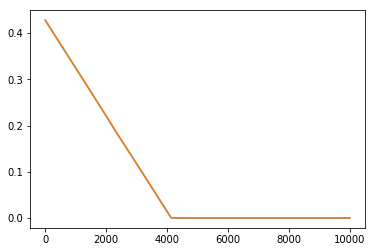

In [63]:
plt.plot(list(enumerate(range(len(rmse_a)))),rmse_a)

In [64]:
list(enumerate(range(10)))

[(0, 0),
 (1, 1),
 (2, 2),
 (3, 3),
 (4, 4),
 (5, 5),
 (6, 6),
 (7, 7),
 (8, 8),
 (9, 9)]

In [38]:
print (rmse_a)

[0.41612488, 0.41612032, 0.4161157, 0.4161111, 0.41610652, 0.41610193, 0.41609734, 0.41609278, 0.41608816, 0.41608354, 0.41607895, 0.41607437, 0.41606978, 0.4160652, 0.4160606, 0.416056, 0.41605145, 0.4160468, 0.4160422, 0.41603765, 0.416033, 0.41602847, 0.41602385, 0.41601926, 0.41601467, 0.41601008, 0.4160055, 0.41600087, 0.41599628, 0.4159917, 0.4159871, 0.4159825, 0.41597793, 0.41597334, 0.41596875, 0.41596413, 0.41595954, 0.41595495, 0.41595036, 0.4159458, 0.41594118, 0.4159366, 0.415932, 0.4159274, 0.41592282, 0.41591823, 0.4159136, 0.41590908, 0.41590443, 0.41589984, 0.41589528, 0.41589066, 0.41588607, 0.41588148, 0.41587692, 0.41587234, 0.41586775, 0.41586313, 0.4158585, 0.41585392, 0.41584933, 0.41584474, 0.41584018, 0.4158356, 0.415831, 0.4158264, 0.41582182, 0.41581723, 0.4158126, 0.41580805, 0.41580346, 0.41579884, 0.41579428, 0.4157897, 0.41578507, 0.41578048, 0.41577592, 0.41577128, 0.41576675, 0.41576216, 0.41575757, 0.41575298, 0.4157484, 0.41574377, 0.41573915, 0.41573

In [40]:
print (rmse_a[-1])

9.5306905e-06


In [65]:
print (pred_list[-1])

[[0.08271737 0.74096894 0.36644593]
 [0.08274032 0.7407568  0.36600387]
 [0.08276369 0.7405446  0.36555776]
 [0.0827866  0.74032974 0.36511484]]
